In [2]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn :: models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# sklearn :: evaluation metrics
from sklearn.metrics import cohen_kappa_score

sns.set_style('whitegrid')

# Problem definition

Predict when a pet will be adopted

# Load the data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(10000, 24) (4993, 23)






# Feature Engineering

In [4]:
print(df_train.columns)
df_train.head()

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,â¥â¥â¥ Lily â¥â¥â¥,36,307,0,2,2,7,0,2,...,1,1,0,41326,337914b09c2fa5460e195197e994ef98,0,Adorable 3 year old Lily looking for a forever...,3f8824a3b,1.0,4
1,2,Cookie,3,266,0,1,6,7,0,2,...,1,1,0,41327,4bb1ebb92158078ad54a6bb23c10dffc,0,i rescue this stary kitten from market near my...,9238eb7fc,1.0,2
2,2,Favour Speedy Abundance And Courage,7,250,252,1,1,2,0,2,...,1,4,0,41327,99ba8ce53b4d8515e417e7921563d923,0,The mother was a Burmese cross and had since p...,f0a1f2b90,2.0,4
3,1,NaN,3,307,0,1,2,0,0,3,...,1,1,0,41327,3f3ef74c486beba3bc87f6dbaee772bf,0,This puppy is: 1. Male 2. 3 months old 3. Brow...,7d028bdea,4.0,2
4,2,Abandoned Kitty,1,266,0,1,1,6,7,1,...,1,1,0,41401,844f03ab8054007d4be6686f3a9702b9,0,Mother cat gave birth to a litter of 3 and too...,8377bfe97,0.0,2


In [5]:
# Check for missing values
df_train.isnull().sum(axis = 0)

Type               0
Name             842
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description        8
PetID              0
PhotoAmt           0
AdoptionSpeed      0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
Type             10000 non-null int64
Name             9158 non-null object
Age              10000 non-null int64
Breed1           10000 non-null int64
Breed2           10000 non-null int64
Gender           10000 non-null int64
Color1           10000 non-null int64
Color2           10000 non-null int64
Color3           10000 non-null int64
MaturitySize     10000 non-null int64
FurLength        10000 non-null int64
Vaccinated       10000 non-null int64
Dewormed         10000 non-null int64
Sterilized       10000 non-null int64
Health           10000 non-null int64
Quantity         10000 non-null int64
Fee              10000 non-null int64
State            10000 non-null int64
RescuerID        10000 non-null object
VideoAmt         10000 non-null int64
Description      9992 non-null object
PetID            10000 non-null object
PhotoAmt         10000 non-null float64
AdoptionSpeed 

In [7]:
df_train.drop(df_train[['PetID', 'Description', 'RescuerID', 'Name']], axis=1)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,1,36,307,0,2,2,7,0,2,2,1,2,1,1,1,0,41326,0,1.0,4
1,2,3,266,0,1,6,7,0,2,1,2,1,2,1,1,0,41327,0,1.0,2
2,2,7,250,252,1,1,2,0,2,1,1,1,2,1,4,0,41327,0,2.0,4
3,1,3,307,0,1,2,0,0,3,1,2,2,2,1,1,0,41327,0,4.0,2
4,2,1,266,0,1,1,6,7,1,1,2,2,2,1,1,0,41401,0,0.0,2
5,1,3,218,0,1,3,5,0,2,1,2,1,2,1,1,0,41326,0,2.0,1
6,1,2,307,0,2,1,7,0,1,2,2,1,2,1,1,0,41326,0,1.0,4
7,1,8,307,0,2,6,0,0,2,1,1,1,1,1,1,0,41336,0,2.0,4
8,2,1,243,245,2,1,2,7,1,1,2,2,2,2,1,0,41326,0,4.0,3
9,1,6,307,0,1,2,7,0,1,1,1,1,2,1,1,0,41327,0,2.0,4


In [8]:
# apply dummies on the training set
col = 'Health'
df_dummies = pd.get_dummies(df_train[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df_train = pd.concat([df_train, df_dummies], axis=1)

# apply the same dummies on the test set
col = 'Health'
df_dummies = pd.get_dummies(df_test[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df_test = pd.concat([df_test, df_dummies], axis=1)

In [9]:
print(df_train.columns)

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'Health_1', 'Health_2', 'Health_3'],
      dtype='object')


In [10]:
# select the columns
X_columns = ['Age', 'Fee', 'Health_1', 'Health_2', 'Health_3', 'Vaccinated', 'Sterilized', 'FurLength','Breed1', 'Breed2']
y_column = ['AdoptionSpeed']

# Model Training

In [11]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8000, 10)
y_train (8000, 1)
X_test (2000, 10)
y_test (2000, 1)


In [12]:
# train a KNN Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

In [13]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())    
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='micro')    
    recall = recall_score(y_test, y_pred, average='micro')
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
#df_results = df_results.sort_values(by=1, ascending=False)
df_results

MODEL Naive Bayes
[[  1  65   0   0   4]
 [ 12 359   0   1  12]
 [  7 476   0   4  22]
 [  8 429   0   3  22]
 [ 10 521   0   3  41]]
Precision 0.202
Recall 0.202

MODEL RandomForestClassifier10
[[  4  22  21   5  18]
 [  3 104 143  52  82]
 [  6 104 216  70 113]
 [  3  92 168  79 120]
 [  4  85 170  67 249]]
Precision 0.326
Recall 0.326
Feature Importance
            0         1
0         Age  0.290698
8      Breed1  0.243320
9      Breed2  0.130157
1         Fee  0.121527
6  Sterilized  0.068460
7   FurLength  0.068404
5  Vaccinated  0.054411
2    Health_1  0.011170
3    Health_2  0.010009
4    Health_3  0.001842

MODEL RandomForestClassifier100
[[  3  23  22   7  15]
 [  4 103 151  34  92]
 [  9  84 229  71 116]
 [  3  74 181  74 130]
 [  4  65 179  73 254]]
Precision 0.3315
Recall 0.3315
Feature Importance
            0         1
0         Age  0.293850
8      Breed1  0.242004
9      Breed2  0.137163
1         Fee  0.122771
7   FurLength  0.063712
5  Vaccinated  0.063574
6  Sterili

,model,precision,recall
0,Naive Bayes,0.2020,0.2020
1,RandomForestClassifier10,0.3260,0.3260
2,RandomForestClassifier100,0.3315,0.3315
3,KNeighborsClassifier,0.3120,0.3120
4,DecisionTreeClassifier,0.3210,0.3210


MODEL Naive Bayes
MODEL RandomForestClassifier10
MODEL RandomForestClassifier100
MODEL KNeighborsClassifier
MODEL DecisionTreeClassifier


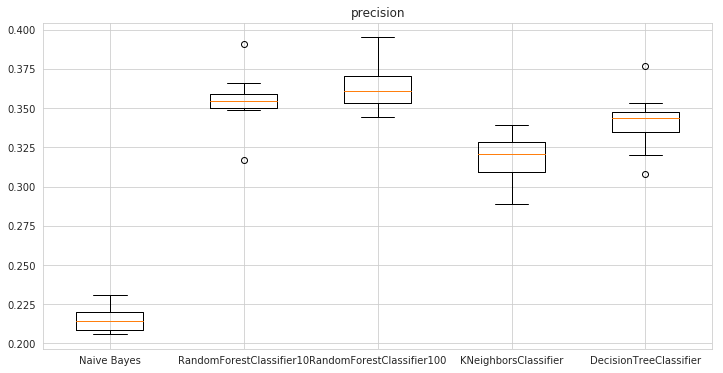

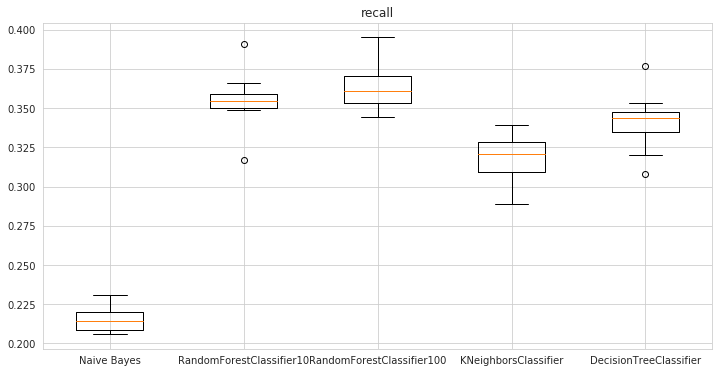

In [14]:
k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average = 'micro')
        recall = recall_score(y_test, y_pred, average = 'micro')
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

In [15]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
for i in range(1,10):
    print(i)
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred = [1 if x > i/10.0 else 0 for x in y_pred]
    precision = precision_score(y_test, y_pred, average = 'micro')
    recall = recall_score(y_test, y_pred, average = 'micro')
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)

/home/khalil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1
[[  4  12   0   0   0]
 [ 32 161   0   0   0]
 [ 74 205   0   0   0]
 [ 73 152   0   0   0]
 [139 148   0   0   0]]
Precision 0.165
Recall 0.165
2
[[  8   8   0   0   0]
 [ 81 112   0   0   0]
 [142 137   0   0   0]
 [128  97   0   0   0]
 [198  89   0   0   0]]
Precision 0.12
Recall 0.12
3
[[ 12   4   0   0   0]
 [125  68   0   0   0]
 [204  75   0   0   0]
 [171  54   0   0   0]
 [241  46   0   0   0]]
Precision 0.08
Recall 0.08
4
[[ 15   1   0   0   0]
 [156  37   0   0   0]
 [253  26   0   0   0]
 [204  21   0   0   0]
 [267  20   0   0   0]]
Precision 0.052
Recall 0.052
5
[[ 16   0   0   0   0]
 [170  23   0   0   0]
 [259  20   0   0   0]
 [209  16   0   0   0]
 [273  14   0   0   0]]
Precision 0.039
Recall 0.039
6
[[ 16   0   0   0   0]
 [181  12   0   0   0]
 [263  16   0   0   0]
 [215  10   0   0   0]
 [281   6   0   0   0]]
Precision 0.028
Recall 0.028
7
[[ 16   0   0   0   0]
 [189   4   0   0   0]
 [271   8   0   0   0]
 [222   3   0   0   0]
 [284   3   0   0   0]]
Prec

# Model Evaluation

In [16]:
kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
print('kappa', round(kappa, 4))
print(confusion_matrix(y_test, y_pred))

kappa -0.001
[[ 16   0   0   0   0]
 [190   3   0   0   0]
 [279   0   0   0   0]
 [223   2   0   0   0]
 [287   0   0   0   0]]


Using Cross Validation

In [17]:
k = 10
results = []
kf = KFold(n_splits=k)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
    results.append(round(kappa, 4))

print('Kappa for each fold:', results)
print('AVG(kappa)', round(np.mean(results), 4))
print('STD(kappa)', round(np.std(results), 4))

Kappa for each fold: [0.3109, 0.2722, 0.2241, 0.2803, 0.2667, 0.2233, 0.2385, 0.2969, 0.2243, 0.2379]
AVG(kappa) 0.2575
STD(kappa) 0.0306


# Prepare your submission

In [18]:
df_prediction = df_test[X_columns]
df_test['AdoptionSpeed'] = model.predict(df_prediction)
df_test[['PetID', 'AdoptionSpeed']]

,PetID,AdoptionSpeed
0,f42161740,1
1,0118db3a8,4
2,e5164d828,2
3,5335bfb38,1
4,ff2cf88a0,4
5,1d13441b9,1
6,7d835cf7c,4
7,577d15fea,3
8,91736f444,2
9,db194aec8,1


In [19]:
df_test[['PetID', 'AdoptionSpeed']].to_csv('submission1_knn.csv', index=False)